In [4]:
import os
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Spotify

In [29]:
tweet_count = 1000
text_query = "spotify"
since_date = "2016-01-01"
until_date = "2020-01-01"

os.system('snscrape --jsonl --max-results {} --since {} twitter-search "{} until:{}"> text-query-tweets.json'.format(tweet_count, since_date, text_query, until_date))
tweets = pd.read_json('text-query-tweets.json', lines=True)

In [30]:
tweets.head(10)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,snscrape.modules.twitter.Tweet,https://twitter.com/ChildishBandit0/status/121...,2019-12-31 23:59:53+00:00,"It's a good ass album, here's a spotify link i...","It's a good ass album, here's a spotify link i...",1212161485893451782,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,1,...,None,NaN,None,1.212161e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",None,None,None,None,NaN
1,snscrape.modules.twitter.Tweet,https://twitter.com/mikekaminski/status/121216...,2019-12-31 23:59:51+00:00,This is how my decade sounded on Spotify. Get ...,This is how my decade sounded on Spotify. Get ...,1212161477169205248,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,None,None,None,[spotifywrapped],NaN
2,snscrape.modules.twitter.Tweet,https://twitter.com/Eleanor_Belle/status/12121...,2019-12-31 23:59:50+00:00,"I don't which is more alarming, the fact that ...","I don't which is more alarming, the fact that ...",1212161472530247681,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,None,None,None,None,NaN
3,snscrape.modules.twitter.Tweet,https://twitter.com/PaulTho65106393/status/121...,2019-12-31 23:59:49+00:00,"@Spotify_Emmie @davido That's his personality,...","@Spotify_Emmie @davido That's his personality,...",1212161468508098562,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,None,NaN,None,1.211425e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,NaN
4,snscrape.modules.twitter.Tweet,https://twitter.com/Adams_Kristen19/status/121...,2019-12-31 23:59:43+00:00,@DaleJr @TouchTunes @Spotify Yessssssss,@DaleJr @TouchTunes @Spotify Yessssssss,1212161444738932736,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,1.212131e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,NaN
5,snscrape.modules.twitter.Tweet,https://twitter.com/foquitasenpai/status/12121...,2019-12-31 23:59:39+00:00,#NowPlaying Till It's Over en #Spotify disponi...,#NowPlaying Till It's Over en #Spotify disponi...,1212161427781238785,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,None,None,None,"[NowPlaying, Spotify, PSMusic]",NaN
6,snscrape.modules.twitter.Tweet,https://twitter.com/louismoonrise/status/12121...,2019-12-31 23:59:29+00:00,"vinil: caro, n só o disco como a vitrola tbm, ...","vinil: caro, n só o disco como a vitrola tbm, ...",1212161384789794817,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,1.212161e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",None,None,None,None,NaN
7,snscrape.modules.twitter.Tweet,https://twitter.com/sinscompany/status/1212161...,2019-12-31 23:59:26+00:00,ESTAMOS EN DIRECTO EN \nFacebook - Sins Music ...,ESTAMOS EN DIRECTO EN \nFacebook - Sins Music ...,1212161373481902081,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,NaN
8,snscrape.modules.twitter.Tweet,https://twitter.com/TheWitchenza/status/121216...,2019-12-31 23:59:21+00:00,The Roaring Twenties: Fancy Flappers and Jazz ...,The Roaring Twenties: Fancy Flappers and Jazz ...,1212161348601360386,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,None,None,None,"[NowPlaying, Spotify]",NaN
9,snscrape.modules.twitter.Tweet,https://twitter.com/Boss_Amero/status/12121613...,2019-12-31 23:59:18+00:00,"Pre-save my new single ""Eye Know U Know Me"" on...","Pre-save my new single ""Eye Know U Know Me"" on...",1212161337725476865,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,None,NaN,None,NaN,None,"[{'_type': 'sn

In [5]:
tweets.to_csv('spotify.csv', sep=',', index=False)

In [6]:
data = pd.read_csv('spotify.csv')

In [26]:
data.shape

(1000, 6)

In [8]:
data['content'].isnull().any()

False

In [9]:
data['date'].isnull().any()

False

In [10]:
data.shape

(1000, 28)

In [11]:
data = data[['content','date']]

In [12]:
data.shape

(1000, 2)

In [14]:
data.head()

,content,date
0,"It's a good ass album, here's a spotify link i...",2019-12-31 23:59:53+00:00
1,This is how my decade sounded on Spotify. Get ...,2019-12-31 23:59:51+00:00
2,"I don't which is more alarming, the fact that ...",2019-12-31 23:59:50+00:00
3,"@Spotify_Emmie @davido That's his personality,...",2019-12-31 23:59:49+00:00
4,@DaleJr @TouchTunes @Spotify Yessssssss,2019-12-31 23:59:43+00:00


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [15]:
data['compound'] = [analyser.polarity_scores(x)['compound'] for x in data['content']]
data['neg'] = [analyser.polarity_scores(x)['neg'] for x in data['content']]
data['neu'] = [analyser.polarity_scores(x)['neu'] for x in data['content']]
data['pos'] = [analyser.polarity_scores(x)['pos'] for x in data['content']]

In [16]:
data

,content,date,compound,neg,neu,pos
0,"It's a good ass album, here's a spotify link i...",2019-12-31 23:59:53+00:00,0.4404,0.132,0.670,0.199
1,This is how my decade sounded on Spotify. Get ...,2019-12-31 23:59:51+00:00,0.0000,0.000,1.000,0.000
2,"I don't which is more alarming, the fact that ...",2019-12-31 23:59:50+00:00,-0.5413,0.099,0.901,0.000
3,"@Spotify_Emmie @davido That's his personality,...",2019-12-31 23:59:49+00:00,0.7624,0.000,0.681,0.319
4,@DaleJr @TouchTunes @Spotify Yessssssss,2019-12-31 23:59:43+00:00,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...
995,o quão burguês você é?\n\n✔️netflix\n❌spotify\...,2019-12-31 23:03:17+00:00,-0.2960,0.031,0.969,0.000
996,o quão burguês você é?\n\n✅netflix \n❌spotify\...,2019-12-31 23:03:17+00:00,-0.2960,0.031,0.969,0.000
997,. @Spotify take me back this is so ghetto,2019-12-31 23:03:15+00:00,0.0000,0.000,1.000,0.000
998,"@Spotify If you will be in Russia , we will st...",2019-12-31 23:03:13+00:00,0.0000,0.000,1.000,0.000


In [17]:
neg_df=data[data['neg'] !=0]
neg_df

,content,date,compound,neg,neu,pos
0,"It's a good ass album, here's a spotify link i...",2019-12-31 23:59:53+00:00,0.4404,0.132,0.670,0.199
2,"I don't which is more alarming, the fact that ...",2019-12-31 23:59:50+00:00,-0.5413,0.099,0.901,0.000
7,ESTAMOS EN DIRECTO EN \nFacebook - Sins Music ...,2019-12-31 23:59:26+00:00,-0.7184,0.200,0.800,0.000
10,We're Playing @1810ojeman on Thursday Jan 9 Do...,2019-12-31 23:59:14+00:00,-0.4588,0.099,0.864,0.037
11,One last fuck you to @Spotify for this year,2019-12-31 23:59:08+00:00,-0.5423,0.304,0.696,0.000
...,...,...,...,...,...,...
989,@Spotify Really needs to update it’s user name...,2019-12-31 23:03:27+00:00,-0.3102,0.093,0.907,0.000
990,Certeza que vai ser a música mais ouvida no me...,2019-12-31 23:03:25+00:00,-0.2960,0.087,0.913,0.000
995,o quão burguês você é?\n\n✔️netflix\n❌spotify\...,2019-12-31 23:03:17+00:00,-0.2960,0.031,0.969,0.000
996,o quão burguês você é?\n\n✅netflix \n❌spotify\...,2019-12-31 23:03:17+00:00,-0.2960,0.031,0.969,0.000


In [18]:
neg_sen = neg_df['neg']
date_sen = neg_df['date']

Text(0.5, 1.0, 'Spotify')

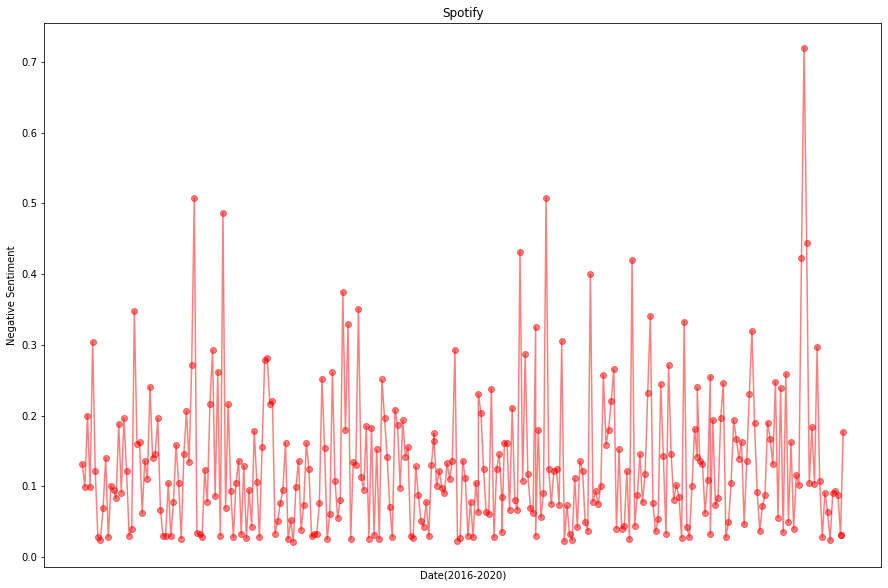

In [32]:
fig, ax = plt.subplots(figsize =(15, 10))
ax.tick_params(axis='x',which='both', bottom=False, top=False, labelbottom=False)
ax.plot_date(date_sen,neg_sen,alpha=0.5,linestyle='solid',color='red')
plt.xlabel("Date(2016-2020)")
plt.ylabel("Negative Sentiment")
plt.title("Spotify")


In [21]:
pos_df = data[data['pos'] !=0]
pos_df

,content,date,compound,neg,neu,pos
0,"It's a good ass album, here's a spotify link i...",2019-12-31 23:59:53+00:00,0.4404,0.132,0.670,0.199
3,"@Spotify_Emmie @davido That's his personality,...",2019-12-31 23:59:49+00:00,0.7624,0.000,0.681,0.319
10,We're Playing @1810ojeman on Thursday Jan 9 Do...,2019-12-31 23:59:14+00:00,-0.4588,0.099,0.864,0.037
14,Antes de que se acabe el año. \nEscucha Mi tem...,2019-12-31 23:59:05+00:00,0.2960,0.000,0.932,0.068
17,@ClaireEStorey immediately downloaded their tr...,2019-12-31 23:58:58+00:00,0.6155,0.000,0.691,0.309
...,...,...,...,...,...,...
984,@SpotifyCares can you confirm if any team is w...,2019-12-31 23:03:48+00:00,-0.3612,0.064,0.905,0.031
987,Watching some top hits of the past decade vide...,2019-12-31 23:03:30+00:00,-0.2617,0.090,0.868,0.042
988,🚨Subscribe to The Daily Devo on Spotify or App...,2019-12-31 23:03:29+00:00,0.7450,0.000,0.810,0.190
992,Ninety Eight Cents Plus Tax by Detroit City Li...,2019-12-31 23:03:20+00:00,0.2023,0.000,0.933,0.067


In [22]:
pos_sen = pos_df['pos']
date_sen_pos = pos_df['date']

Text(0.5, 1.0, 'Spotify')

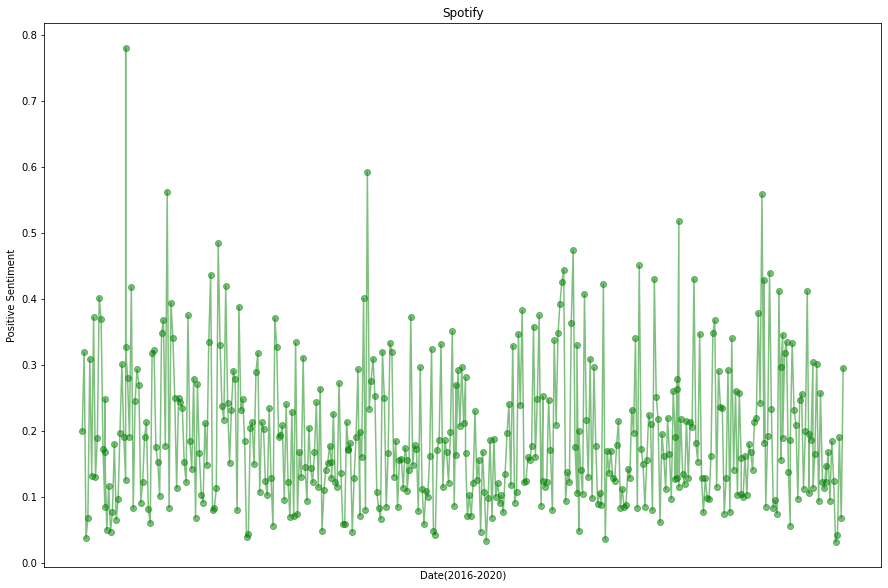

In [33]:
fig, ax = plt.subplots(figsize =(15, 10))
ax.tick_params(axis='x',which='both', bottom=False, top=False, labelbottom=False)
ax.plot_date(date_sen_pos,pos_sen,alpha=0.5,linestyle='solid',color='green')
plt.xlabel("Date(2016-2020)")
plt.ylabel("Positive Sentiment")
plt.title("Spotify")